# 1.1 PIL - python imaging library
- pip install pillow
- It provides basic image handling operations (resizing, cropping, etc)

In [2]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
from PIL import Image

pil_im = Image.open('/Users/sejongpyo/Downloads/building.jpg')

# convert to Grayscale
# pil_im = Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L')

### Convert images to another format

In [ ]:
from PIL import Image
import os

for infile in filelist:
    outfile = os.path.splitext(infile)[0] + '.jpg'
    
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)

### Create thumbnails
- convert the image to a thumbnail image with size

In [ ]:
pil_im.thumbnail((128, 128))

### Copy and paste regions
- crop : cropping a region
- paste : PIL uses a coordinate system with (0, 0) in the upper left corner.

In [12]:
box = (100, 100, 400, 400)
region = pil_im.crop(box)

In [13]:
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)

### Resize and rotate

In [14]:
# resize
out = pil_im.resize((128, 128))

# rotate
out = pil_im.rotate(45)

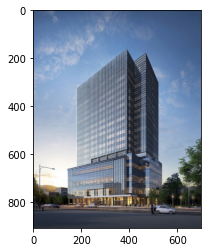

In [11]:
plt.imshow(pil_im)

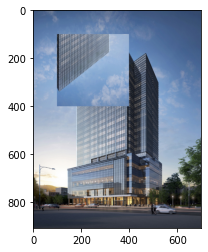

In [15]:
# copy and paste
plt.imshow(pil_im)

# 1.2 Matplotlib (pylab)
### Plotting images, points and lines
- show things like interest points, correspondences and detected objects using points and lines.

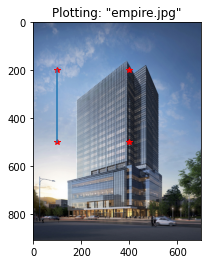

In [4]:
from PIL import Image
from pylab import *

im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg'))

imshow(im)

x = [100,100,400,400]
y = [200,500,200,500]

# plot the points with red star-markers
plot(x, y, 'r*')

# line plot connecting the first two points
plot(x[:2], y[:2])

# add title and show the plot
title('Plotting: "empire.jpg"')
show()

### Image contours and histograms
- Visualizing image iso-contours can be very useful.

(0.5, 699.5, 0.5, 905.5)

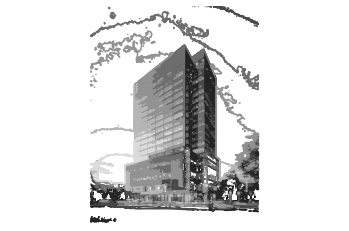

In [18]:
from PIL import Image
from pylab import *

im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))

figure()

gray()

contour(im, origin = 'image')
axis('equal')
axis('off')

- image histogram shows the distribution of pixel values.
- hist(1-D array as input, bins)

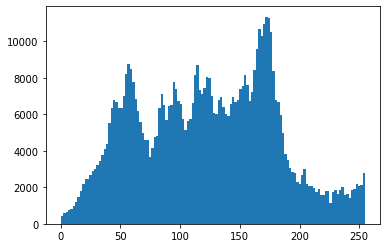

In [19]:
figure()
hist(im.flatten(), 128) # number of bins to use
show()

### Interactive annotation
- marking points in an image, or annotate some training data.

In [ ]:
im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg'))
imshow(im)

print('Please click 3 points')
x = ginput(3)
print('you cliked: ', x)
show()

# 1.3 Numpy
### Array image representation
- Arrays in NumPy are multi-dimensional and can represent vectors, matrices, and images.
- Like a list but restricted to having all elements of the same type.

In [26]:
im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg'))
print(im.shape, im.dtype)

im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'), 'f')
print(im.shape, im.dtype)

(906, 700, 3) uint8
(906, 700) float32


- (rows, columns, color channels)
- Images are usually encoded with unsigned 8-bit integers (uint8)
- grayscale image doesn't have a color channels

In [ ]:
# set the values of row i with values from row j
im[i,:] = im[j,:]

# set all values in column i to 100
im[:,i] = 100

# the sum of the values of the first 100 rows and 50 columns
im[:100,:50].sum()

# rows 50-100, columns 50-100 (100th not included)
im[50:100,50:100]

# average of row i
im[i].mean()

# last column
im[:,-1]

# second to last row
im[-2,:]

### Graylevel transforms

In [101]:
im = array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))

# invert image
im2 = 255 - im

# clamp to interval 100 ... 200
im3 = (100.0/255) * im + 100

# squared (lowers the values of the darker pixels)
im4 = 255.0 * (im / 255.0)**2

In [41]:
print(int(im.min()), int(im.max()))
print(int(im2.min()), int(im2.max()))
print(int(im3.min()), int(im3.max()))
print(int(im4.min()), int(im4.max()))

0 255
0 255
100 200
0 255


- reverse of the array() transformation

In [47]:
pil_im = Image.fromarray(im)

- operation to change the data type from 'uint8' to another, need to convert back
- <u>Numpy will always change the array type to the 'lowerst' type that can represent the data</u>

In [43]:
pil_im = Image.fromarray(uint8(im))

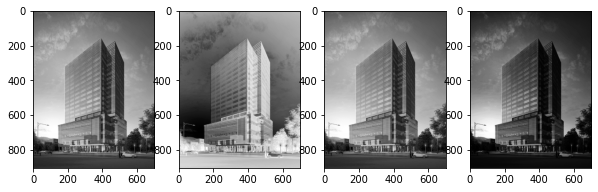

In [48]:
f, ax = plt.subplots(1, 4, figsize = (10, 7))
ax[0].imshow(im)
ax[1].imshow(im2)
ax[2].imshow(im3)
ax[3].imshow(im4)

### Image resizing

In [55]:
def imresize(im,sz):
    """ Resize an image array using PIL. """
    pil_im = Image.fromarray(uint8(im))
    
    return array(pil_im.resize(sz))

### Histogram equalization
- grayscale transform is the one of histogram equalization.
- good way to normalize image intensity and to increase image contrast.
- The transform funciton is in this case a cdf (cumulative distribution function) of the pixel values.

In [124]:
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(), nbr_bins, normed=True)
    
    # cumulative distribution function
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1] # normalize
    
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(), bins[:-1], cdf)
    
    return im2.reshape(im.shape), cdf

im2, cdf = histeq(array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L')))

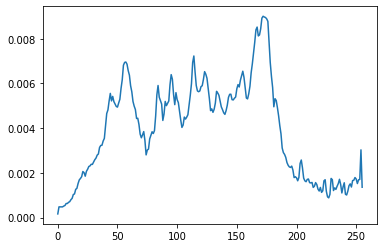

In [125]:
plot(imhist)

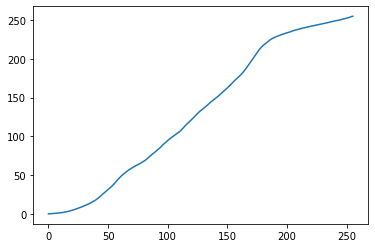

In [126]:
plot(cdf)

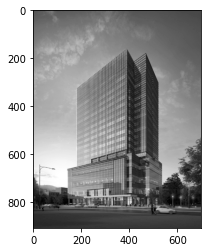

In [122]:
imshow(im)

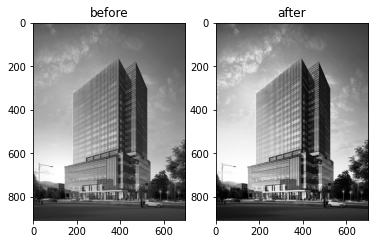

In [128]:
f, ax = plt.subplots(1, 2)
ax[0].imshow(im)
ax[0].set_title('before')
ax[1].imshow(im2)
ax[1].set_title('after')
plt.show()

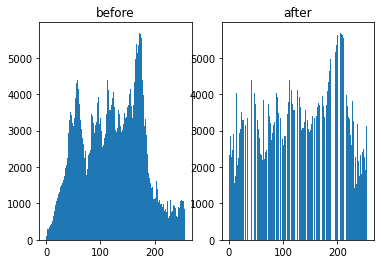

In [127]:
f, ax = plt.subplots(1, 2)
ax[0].hist(im.flatten(), 256)
ax[0].set_title('before')
ax[1].hist(im2.flatten(), 256)
ax[1].set_title('after')
plt.show()

### Averaging images
- reduce noise in an image and also often used for artistic effects.
- compute the average of all those images by simply summing them up and divide with number of images.

In [91]:
def compute_average(imlist):
    """ Compute the average of a list of images. """
    
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    
    skipped =  0
    
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
            skipped += 1
            
    averageim /= (len(imlist) - skipped)
    
    # return average as uint8
    return array(averageim, 'uint8')

### PCA of images
- useful technique for dimensionality reduction
- projection matrix resulting from PCA can be seen as a change of coordinates to a coordinate system where the coordinates are in descending order of importance.
1. convert image to 1D (flatten).
2. Stack 1D image in a single matrix by each row.
3. The rows are then centered relative to the mean image before the computation of the dominant directions.
- To find the principal components, SVD (singular value decomposition(SVD) is usually used)

In [1]:
def pca(X):
    """ Principal Component Analysis
        input: X, matrix with training data stored as flattened arrays in rows
        return: projection matrix (with important dimensions first), variance and mean. """
    # get dimensions
    num_data, dim = X.shape
    
    # center data
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim > num_data:
        # PCA - compact trick used
        M = np.dot(X, X.T) # covariance matrix
        e,EV = np.linalg.eigh(M) # eigenvalues and eigenvectors
        tmp = np.dot(X.T, EV).T # this is the compact trick
        # reverse since last eigenvectors are the ones we want 
        V = tmp[::-1]
        # reverse since eigenvalues are in increasing order
        S = sqrt(e)[::-1]
        
        for i in range(V.shape[1]):
            V[:, i] /= S
    else:
        # PCA - SVD used
        U, S, V = np.linalg.svd(X)
        V = V[:num_data] # only makes sense to return the first num_data
        
    # return the projection matrix, the variance and the mean
    return V, S, mean_X

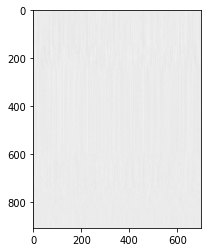

In [9]:
# load img
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
m, n = im.shape

im -= np.mean(im, axis = 0).astype('uint8')
cov = im.T.dot(im) / m
U, S, V = np.linalg.svd(cov)
im_pca = im.dot(U)

figure()
gray()
imshow(im_pca)
show()

### Using the Pickle module
- Pickling : Pickle can take almost any Python object and convert it to a string representation.
- String representation can then be easily stored or transmitted.

In [ ]:
# save mean and principal components
f = open('font_pca_modes.pkl', 'wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()

In [ ]:
# load mean and principal components
f = open('font_pca_modes.pkl', 'rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()

In [ ]:
# open file and save
with open('font_pca_modes.pkl', 'wb') as f:
    pickle.dump(immean,f)
    pickle.dump(V,f)

In [ ]:
# open file and load
with open('font_pca_modes.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

# 1.4 SciPy
- provide efficient routines for a number of operations, <u>image processing</u>

### Blurring images
- image is convolved with a Gaussian kernel to create a blurred version.
- $I_{\sigma} = I * G_{\sigma}$
- $*$ : convolution
- $G_{\sigma}$ : Gaussian 2D-kernel with std $\sigma$
- $G_{\sigma} = \frac{1}{2\pi \sigma}e^{-(x^{2} + y^{2})/2\sigma^{2}}$

In [12]:
from PIL import Image
import numpy as np
from scipy.ndimage import filters

im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 5) # last element is std (sigma)

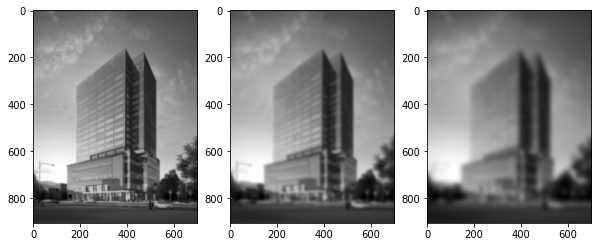

In [25]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
std = [2, 5, 10]

f, ax = subplots(1, 3, figsize = (10, 7))
for i, v in enumerate(std):
    ga =filters.gaussian_filter(im, v)
    ax[i].imshow(ga)

plt.show()

### Image derivatives
- Intensity change is important information.
- It can be described with the x and y derivatives $I_{x}$ and $I_{y}$ of the Image.
- Image gradient : $\nabla I = [I_{x} I_{y}]^{T}$
- Gradient magnitude : $|\nabla I|=\sqrt{I_{x}^{2} + I_{y}^{2}}$
- Gradient magnitude : how strong the image intensity change
- Gradient angle : $\alpha = arctan2(I_{y}, I_{x})$
- Gradient angle : direction of largest intensity change at each pixel.
- compute the image derivatives can be done using discrete approximations and implement convolutions.
- $I_{x} = I*D_{x}$ and $I_{y} = I*D_{y}$
- Mostly, use Prewitt filters or Sobel filters.

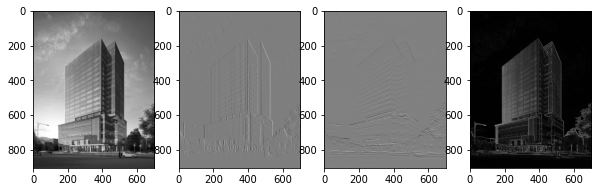

In [31]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))

# Sobel derivative filters
imx = zeros(im.shape)
filters.sobel(im, 1, imx)

imy = zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = sqrt(imx**2 + imy**2)

f, ax = subplots(1, 4, figsize = (10, 7))
ax[0].imshow(im)
ax[1].imshow(imx)
ax[2].imshow(imy)
ax[3].imshow(magnitude)
plt.show()

- positive derivatives are shown with bright pixels.
- negative derivatives are dark.
- Gray areas have values close to zero.


- To be more robust to image noise and to compute derivatives at any scale, use Gaussian derivative filters.
- $I_{x} = I*G_{\sigma x}$ and $I_{y} = I*G_{\sigma y}$

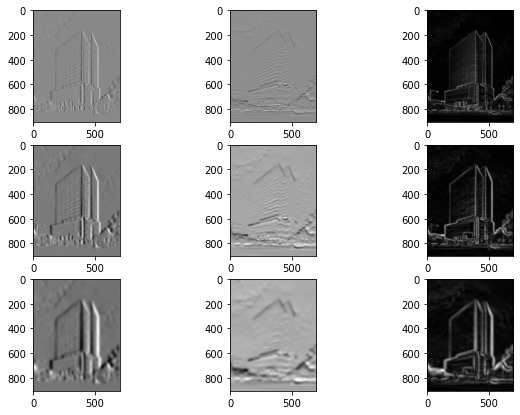

In [30]:
# Use Gaussian derivative filters
sigma = [2, 5, 10] # std

fig, ax = subplots(3, 3, figsize = (10, 7))
for i, v in enumerate(sigma):
    imx = zeros(im.shape) # third (0, 1) or (1, 0) : which direction.
    filters.gaussian_filter(im, (v, v), (0, 1), imx)

    imy = zeros(im.shape)
    filters.gaussian_filter(im, (v, v), (1, 0), imy)
        
    magnitude = sqrt(imx**2 + imy**2)
    
    ax[i, 0].imshow(imx)
    ax[i, 1].imshow(imy)
    ax[i, 2].imshow(magnitude)

### Morphology - counting objects
- Morphology is a collection of image processing methods.
- Usually applied to binary images (each pixel takes only two values.)

In [35]:
from scipy.ndimage import measurements, morphology

im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
# threshold to make sure it is binary
im = 1*(im<128)

labels, nbr_objects = measurements.label(im)
print('Number of objects: ', nbr_objects)

Number of objects:  679


- label() : find the individual objects and assigns integer labels to pixels.
- Use binary opening to remove small connections between some of the objects.

In [37]:
# morphology - opening to separate objects better
im_open = morphology.binary_opening(im, np.ones((9,5)), iterations=2)

# np.ones(()) : an array that indicates what neighbors to use when centered around a pixel.

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)

Number of objects: 21


# 1.5 Advanced example: Image de-noising
- Process of removing image noise with trying to preserve details and structures.
- ROF (Rudin-Osher-Fatemi de-noising model)
- find a smoother versio of the image while preserving edges and structures.

### ROF mathematics
- total variation (TV) of a image I (defined by the sum of the gradient norm).
- $J(I) = \int |\nabla I|dx$
- TV : $J(I) = \sum_{X}|\nabla I|$, $X = [x, y]$ (all image coordinates)
- (Chambolle) version of ROF, the goal is to find a de-noised image U that minimizes
- $min_{U}||I-U||^{2}+2\lambda J(U)$
- model looks for images that are <u>flat</u> but allow <u>jumps</u> at edges between regions.

In [38]:
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """
    An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented in eq (11) A. Chambolle (2005).
    Input: noisy input image (grayscale),
           initial guess for U,
           weight of the TV-regularizing term,
           steplength,
           tolerance for stop criterion.
    Output: denoised and detextured image,
            texture residual.
    """
    
    m,n = im.shape #size of noisy image
    
    # initialize
    U = U_init
    Px = im #x-component to the dual field
    Py = im #y-component of the dual field
    error = 1
    
    while (error > tolerance):
        Uold = U
        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U’s gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U’s gradient

        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))

        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)

        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component

        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable

        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);
    
    return U, im-U # denoised image and texture residual

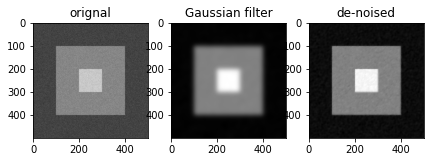

In [43]:
from scipy.ndimage import filters

# create synthetic image with noise
im = zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300] = 255
im = im + 30 * np.random.standard_normal((500, 500))

U, T = denoise(im, im)
G = filters.gaussian_filter(im, 10)

f, ax = plt.subplots(1, 3, figsize = (7, 7))
ax[0].imshow(im)
ax[1].imshow(G)
ax[2].imshow(U)
ax[0].set_title('orignal')
ax[1].set_title('Gaussian filter')
ax[2].set_title('de-noised')
plt.show()

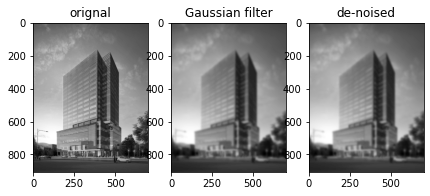

In [45]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))

G = filters.gaussian_filter(im, 5)
U, T = denoise(G, G)

f, ax = plt.subplots(1, 3, figsize = (7, 7))
ax[0].imshow(im)
ax[1].imshow(G)
ax[2].imshow(U)
ax[0].set_title('orignal')
ax[1].set_title('Gaussian filter')
ax[2].set_title('de-noised')
plt.show()

# Exercises 1

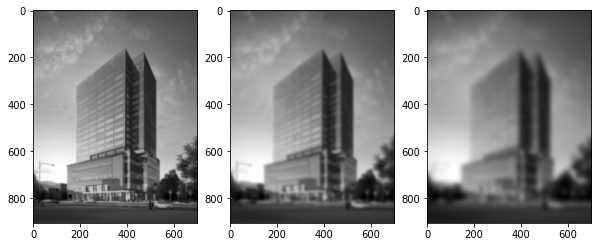

In [49]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
std = [2, 5, 10]

f, ax = subplots(1, 3, figsize = (10, 7))
for i, v in enumerate(std):
    ga =filters.gaussian_filter(im, v)
    ax[i].imshow(ga)

plt.show()

# Exercises 2

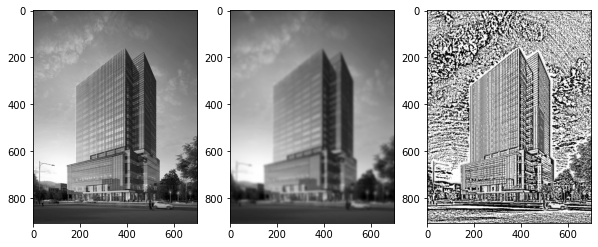

In [54]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
blur = filters.gaussian_filter(im, 4)
sharpend_gr = blur - im

f, ax = subplots(1, 3, figsize = (10, 7))
ax[0].imshow(im)
ax[1].imshow(blur)
ax[2].imshow(sharpend_gr)
plt.show()

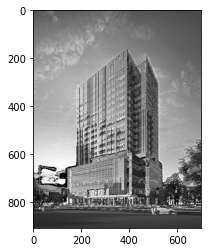

In [58]:
im3 = np.clip(im - sharpend_gr, 0, 255)
imshow(im3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


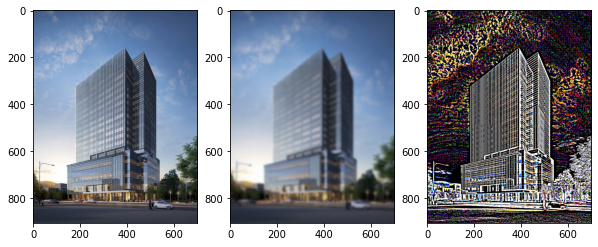

In [61]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg'))
blur = np.zeros(im.shape)
for i in range(3):
    blur[:, :, i] = filters.gaussian_filter(im[:, :, i], 4)
sharpend_gr = blur - im

f, ax = subplots(1, 3, figsize = (10, 7))
ax[0].imshow(im)
ax[1].imshow(uint8(blur))
ax[2].imshow(sharpend_gr)
plt.show()

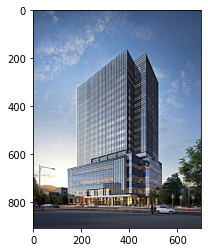

In [62]:
im3 = uint8(np.clip(im - sharpend_gr, 0, 255))
imshow(im3)

# Exercises 3

In [68]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
im, cdf_im = histeq(im)

blur = filters.gaussian_filter(im, 4)
blur, cdf_blur = histeq(blur)

quotient = im / (im.dot(blur))


ValueError: operands could not be broadcast together with shapes (906,700) (906,906) 

# Exercises 4

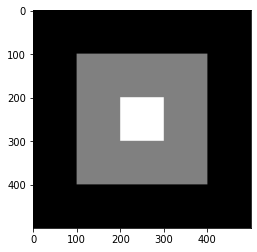

In [89]:
im = zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300]=255
figure()
gray()
imshow(im)
show()

In [71]:
def edge(im):
    imx = zeros(im.shape)
    filters.sobel(im, 1, imx)

    imy = zeros(im.shape)
    filters.sobel(im, 0, imy)

    magnitude = sqrt(imx**2 + imy**2)
    
    return magnitude

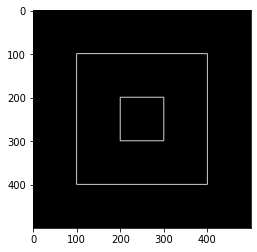

In [73]:
imshow(edge(im))
plt.show()

# Exercises 5

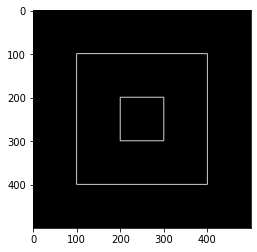

In [93]:
result = edge(im)
plt.imshow(result)
plt.show()

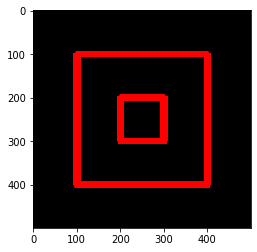

In [95]:
plt.imshow(result)
x, y = np.nonzero(result)

plot(x, y, 'r*')

# Exercises 6

Number of objects:  679


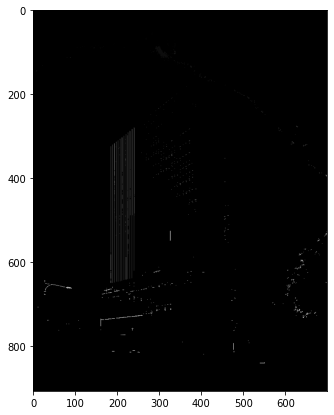

In [97]:
im = np.array(Image.open('/Users/sejongpyo/Downloads/building.jpg').convert('L'))
# threshold to make sure it is binary
im = 1*(im<128)

labels, nbr_objects = measurements.label(im)
print('Number of objects: ', nbr_objects)

figure(figsize = (10, 7))
imshow(lables)
show()

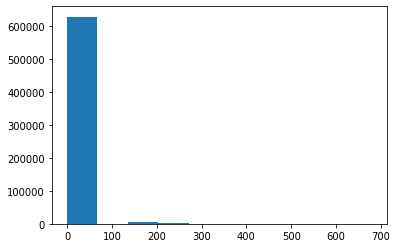

In [98]:
figure()
hist(lables.flatten())
show()

# Exercises 7